In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-98-cf141d2e4c3c>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [ ]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [ ]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

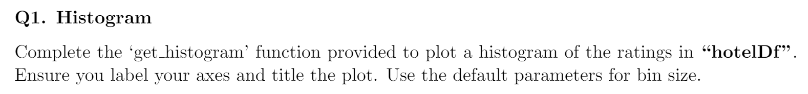

In [ ]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    fig = plt.figure(figsize=figsize)
    plt.title("Histogram of ratings")
    plt.hist(df["ratingScore"].values)
    plt.xlabel("Ratings")
    plt.ylabel("Frequency")

    ## end ##

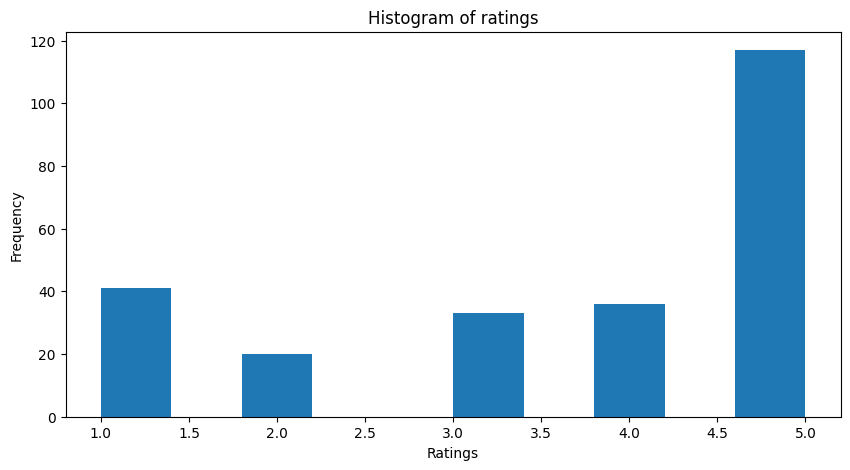

In [ ]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

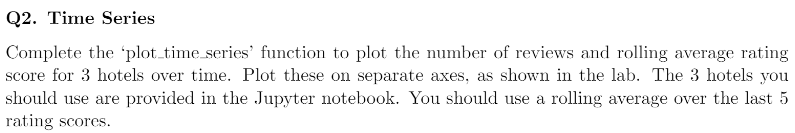

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_series(df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

    unique_hotels = df['hotelName'].unique()

    for hotel in unique_hotels:
        _df = df[df['hotelName'] == hotel].set_index('date_stamp')
        _df.index = pd.to_datetime(_df.index)
        _df = _df.sort_index()

        _df['count'] = 1
        _df['count'].cumsum().plot(ax=ax[0], label=hotel, marker='o')
        _df['ratingScore'].rolling(5).mean().plot(ax=ax[1], label=hotel)

    ax[0].set_ylabel('Number of Reviews')
    ax[1].set_ylabel('Avg Rating')
    ax[1].set_xlabel('Date')
    plt.legend()


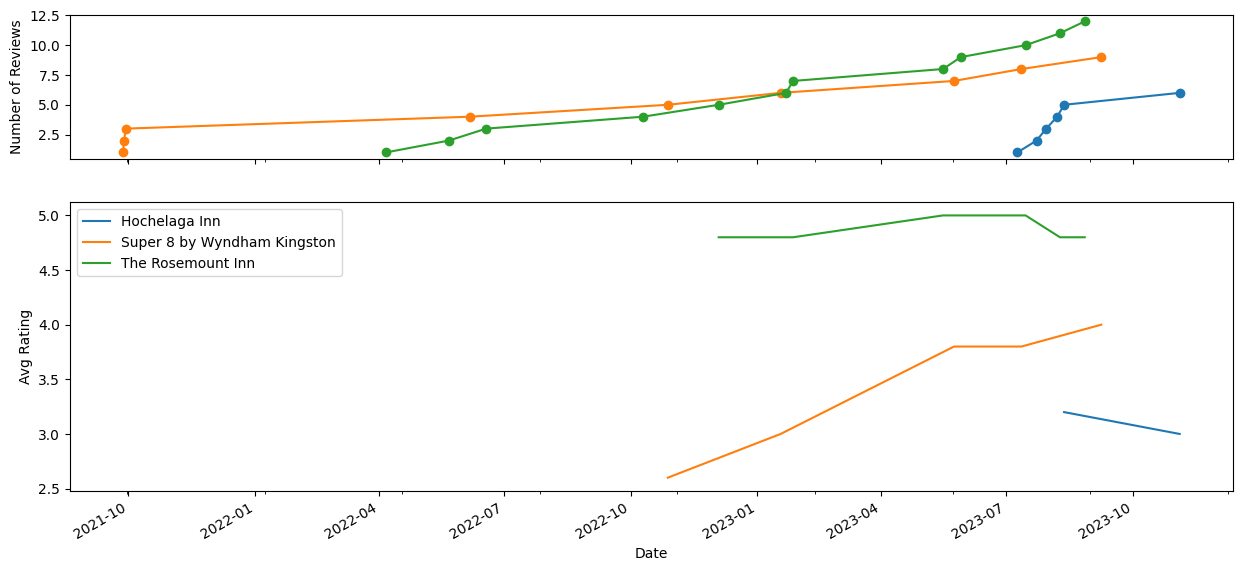

In [ ]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

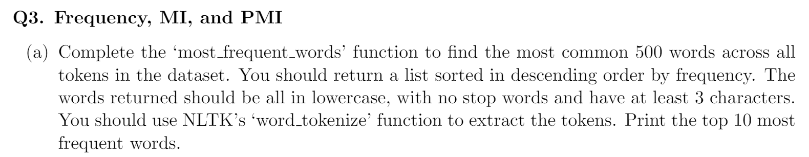

## (a)

In [ ]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  stop = get_stop_words()
  counter = Counter()

  reviews = df['reviewColumn'].values

  # go through each review and feed words into counter
  for review in reviews:
          counter.update([word.lower()
                          for word
                          in word_tokenize(review)
                          if word.lower() not in stop and len(word) > 2])

  # get top k most common
  topk = counter.most_common(kwords)
  ## end ##
  return topk

In [ ]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

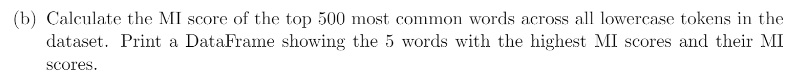

In [ ]:
## Your code starts here ##
reviewDF = hotelDf[['reviewColumn', 'ratingScore']]

def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)

    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

# get Top K mutual information terms from the dataframe
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

def getMI(topk, df):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df['groundTruth'], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

miScoredf = getMI(topk, finaldf)
miScoredf.head()

## end ##

,Word,MI Score
3,great,0.070770
99,dirty,0.066292
11,n't,0.051020
0,clean,0.047330
42,floor,0.041603


## (c)

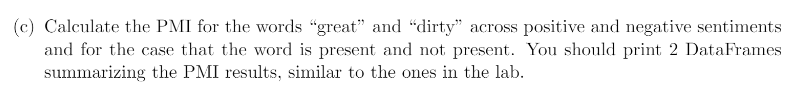

In [ ]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##
  pmilist=[]
  N = df.shape[0]
  for sentiment in ['positive','negative']:
      for word_present in [False,True]:
          px = sum(df['groundTruth']==sentiment)
          py = sum(df[word]==word_present)
          pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

          if pxy==0:#Log 0 cannot happen
              pmi = math.log((pxy+0.0001)*N/(px*py))
          else:
              pmi = math.log(pxy*N/(px*py))

          pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    #assemble the results into a dataframe
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']


  ## end ##
  return pmidf

In [ ]:
# calc_pmi for "great"
calc_pmi(finaldf,'great')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,187,98,-0.167191
1,positive,True,153,60,55,0.391939
2,negative,False,94,187,89,0.223621
3,negative,True,94,60,5,-1.518813


In [ ]:
# calc_pmi for "dirty"
calc_pmi(finaldf,'dirty')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

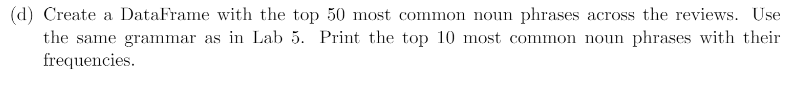

In [ ]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [ ]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  counter = Counter()
  reviews = df['reviewColumn'].values

  for review in reviews:
          counter.update(flatten_phrase_lists([word
                          for word
                          in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                          ]))
  topk = counter.most_common(kNPs)
  return topk

In [ ]:
# Print top 10 most common noun phrases
topk_phrase = getTopKNP(finaldf, 50)
topk_phrase[:10]

[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

## (e)

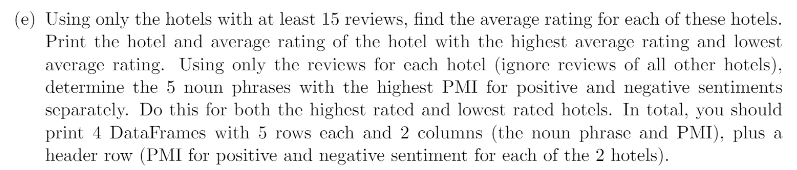

In [ ]:
## Your code starts here ##
# Filter hotels with at least 15 reviews
hotels_filtered = hotelDf[hotelDf['numReviews'] >= 15]

# Calculate average ratings
average_ratings = hotels_filtered.groupby('hotelName')['ratingScore'].mean().reset_index()
topRating = average_ratings.reset_index(drop=False)\
                               .sort_values('ratingScore',ascending=False)[['hotelName','ratingScore']].head(1)
lowestRating = average_ratings.reset_index(drop=False)\
                               .sort_values('ratingScore',ascending=True)[['hotelName','ratingScore']].head(1)
combDF = pd.concat([topRating, lowestRating])
combDF


## end ##

,hotelName,ratingScore
4,Residence Inn by Marriott Kingston Water&#39;s Edge,4.782609
0,Bayside Inn &amp; Waterfront Suites,2.656250


In [ ]:
# Top Hotel Positive PMI
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
topHotel = finaldf_phrase.query("hotelName == 'Residence Inn by Marriott Kingston Water&#39;s Edge'")

pmiposdf_phrase = pmiForAllCal(topHotel,topk_phrase,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)


100%|██████████| 50/50 [00:00<00:00, 1124.57it/s]


,pmi
great view,0.044452
custom servic,0.044452
hockey tournament,0.044452
resid inn,0.044452
comfort bed,0.044452


In [ ]:
# Top Hotel Negative PMI
topHotel = finaldf_phrase.query("hotelName == 'Residence Inn by Marriott Kingston Water&#39;s Edge'")
pmiposdf_phrase = pmiForAllCal(topHotel,topk_phrase,'negative')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)


100%|██████████| 50/50 [00:00<00:00, 932.77it/s]


,pmi
air condit,3.135494
next morn,3.135494
next time,2.442347
front desk,2.036882
custom servic,-6.074846


In [ ]:
# Bottom Hotel Positive PMI
bottomHotel = finaldf_phrase.query("hotelName == 'Bayside Inn &amp; Waterfront Suites'")
pmiposdf_phrase = pmiForAllCal(bottomHotel,topk_phrase,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)


100%|██████████| 50/50 [00:00<00:00, 948.90it/s]


,pmi
great view,1.163151
great locat,1.163151
reason price,1.163151
nice bathroom,1.163151
downtown kingston,1.163151


In [ ]:
# Bottom Hotel Negative PMI
topHotel = finaldf_phrase.query("hotelName == 'Bayside Inn &amp; Waterfront Suites'")
pmiposdf_phrase = pmiForAllCal(bottomHotel,topk_phrase,'negative')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)


100%|██████████| 50/50 [00:00<00:00, 920.80it/s]


,pmi
good locat,0.374693
park lot,0.374693
credit card,0.374693
next day,0.374693
king bed,0.374693


# Q4

## (a)

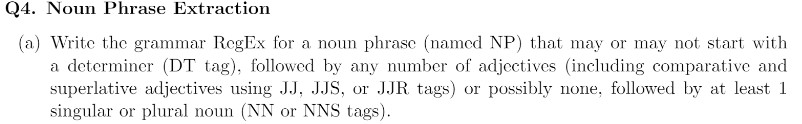

In [ ]:
grammar = "NP: {<DT>?<JJ.*>*<NN.*>+}"

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

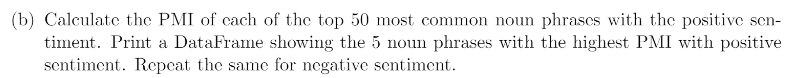

In [ ]:
## Your code starts here ##
topk_phrase = getTopKNP(finaldf, 50)
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
## end ##

In [ ]:
# Positive PMI
pmiposdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 963.98it/s]


,pmi
reason price,0.47895
green acr inn,0.47895
super clean,0.47895
conveni locat,0.47895
great breakfast,0.47895


In [ ]:
# Negative PMI
pmiposdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'negative')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 868.52it/s]


,pmi
first floor,0.966094
last time,0.966094
air condition,0.966094
next morn,0.966094
credit card,0.966094


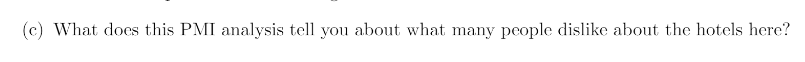

## (c)
Air conditioning may suggests that there has been frequent issues with air conditioning in hotel rooms.
Credit card suggests that there could be frustrations related to payment. First floor potentially suggests that guests may have issues with the first floor. Last time probably suggests that the guests had unpleasant stay and this would be their last time here. Next morning suggests there were issues when they woke up.
